
**Comentario del Revisor**

Hola!

Soy Juan Manuel Romero, pero siéntete libre de llamarme Juanma. Soy code reviewer en Tripleten y hoy estaré revisando tu entrega.

Para simular la dinámica de un ambiente de trabajo, si veo algún error, en primer instancia solo los señalaré, dándote la oportunidad de encontrarlos y corregirlos por tu cuenta. En un trabajo real, el líder de tu equipo hará una dinámica similar. En caso de que no puedas resolver la tarea, te daré una información más precisa en la próxima revisión. 

Solo un aviso rápido: cuando estés revisando el proyecto, por favor deja mis comentarios originales tal como están. De esta manera, podemos seguir fácilmente el progreso y asegurarnos de que no se nos pase nada por alto. Y, si realizas algún cambio basado en mis comentarios, sería genial si pudieras resaltar esas actualizaciones para que se destaquen.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como estas:

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Éxito. Todo se ha hecho correctamente.

</div>


<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.

</div> 


<div class="alert alert-block alert-danger">
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Requiere corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con los comentarios en rojo.

</div>

Puedes responderme usando esto:

<div class="alert alert-block alert-info"> <b>Respuesta del estudiante.</b> <a class="tocSkip"></a> </div>

# __Análisis exploratorio de datos (Python)__

## Analisis Viajes Chicago

Analizaremos los viajes de Chicago para identificar estadisticos que nos permitan conocer el comportamiento de las personas

In [10]:
# Cargamos librerias requeridas

import pandas as pd
from math import factorial
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 

### Carga de Datos

In [11]:
# Cargamos el dataset games

trips = pd.read_csv('G:/.shortcut-targets-by-id/1ec4irvsZdM58w7ZpjkoK9daldWphQX4A/Proyectos/datasets/project_sql_result_01.csv')
barrios = pd.read_csv('G:/.shortcut-targets-by-id/1ec4irvsZdM58w7ZpjkoK9daldWphQX4A/Proyectos/datasets/project_sql_result_04.csv')

### Preparacion de Datos

Exploramos los datos y realizamos las correcciones pertinentes

In [12]:
# Visualizamos toda la información del dataframe
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


Observamos que no hya valores nulos y el tipo de datos es correcto, verificamos que no se tengan duplicados, procedemos a realizar el analisis del siguiente dataset

In [13]:
print(trips.duplicated().sum())
trips.head(5)

0


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [14]:
barrios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


No existen nulos y el tipo de datos es correcto por lo que procedemos a revisar duplicados y visualizar una parte del dataframe

In [15]:
print(barrios.duplicated().sum())
barrios.head(5)


0


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

¡Excelente trabajo estudiando los datasets! Esto es fundamental para entender los datos y planificar el análisis.

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Recuerda dejar comentarios sobre tus análisis de los mismos. 

</div>

</div>

## Top 10 barrios

Visualizamos los 10 principales barrios con base al promeio de viajes de finalizacion

In [16]:
barrios.columns = ['barrio', 'avg_trips']
top_10_barrios= barrios.sort_values(by='avg_trips', ascending=False).head(10) # Ordenamos por barrio con mayor promedio de viajes
top_10_barrios


,barrio,avg_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Correcto! La lista de los top barrios es la esperada.

</div>

## Analisis, gráficos y conclusiones

Debido a que tenemos 64 empresas diferentes nos vamos a centrar en analizar el 80% del total de viajes por lo que procesamos la información y gráficamos

In [17]:
trips_by_company = trips.groupby('company_name').sum().reset_index().sort_values(by='trips_amount', ascending=False) # Agrupamos por compañia y sumamos los viajes
trips_by_company['acumulado'] = trips_by_company['trips_amount'].cumsum() # Calculamos el acumulado de viajes
total_viajes = trips_by_company['trips_amount'].sum() # Calculamos el total de viajes
trips_by_company['porcentaje'] = trips_by_company['acumulado'] / total_viajes * 100 # Calculamos el porcentaje acumulado de viajes
empresas_top=trips_by_company[trips_by_company['porcentaje']<=80] # Seleccionamos las empresas que acumulan el 80% de los viajes
empresas_top

,company_name,trips_amount,acumulado,porcentaje
45,Flash Cab,19558,19558,14.243578
61,Taxi Affiliation Services,11422,30980,22.561921
50,Medallion Leasing,10367,41347,30.111936
63,Yellow Cab,9888,51235,37.313107
60,Taxi Affiliation Service Yellow,9299,60534,44.085325
36,Chicago Carriage Cab Corp,9181,69715,50.771606
43,City Service,8448,78163,56.924063
59,Sun Taxi,7701,85864,62.532499
58,Star North Management LLC,7455,93319,67.961780
33,Blue Ribbon Taxi Association Inc.,5953,99272,72.297194


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Excelente trabajo analizando las compañias!

</div>

C:\Users\javie\AppData\Local\Temp\ipykernel_9092\1031775848.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='company_name', y='trips_amount', data=empresas_top, palette='viridis',edgecolor='black')


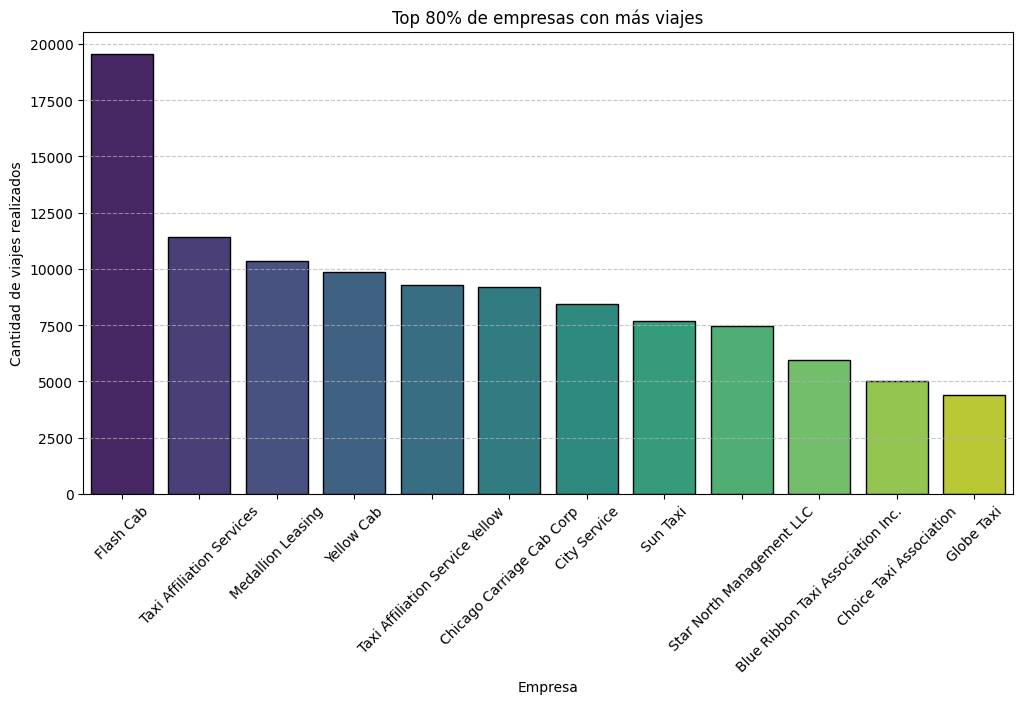

In [18]:
plt.figure(figsize =(12,6))
sns.barplot(x='company_name', y='trips_amount', data=empresas_top, palette='viridis',edgecolor='black')
plt.xticks(rotation=45)
plt.title('Top 80% de empresas con más viajes')
plt.xlabel('Empresa')
plt.ylabel('Cantidad de viajes realizados')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Correcto! El plot es correcto y el resultado es el esperado.

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Puedes rotar levemente los tags del eje x para que se puedan leer mejor.

</div>

</div>

<div class="alert alert-block alert-info">
<b>Observamos que existen 12 empresas de taxis que liderean el mercado sin embargo Flash Cab es la empresa mejor posicionada por brindar mayores servicios de viajes</b> <a class=“tocSkip”></a>
</div>

C:\Users\javie\AppData\Local\Temp\ipykernel_9092\1953812398.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='barrio', y='avg_trips', data=top_10_barrios, palette='viridis',edgecolor='black')


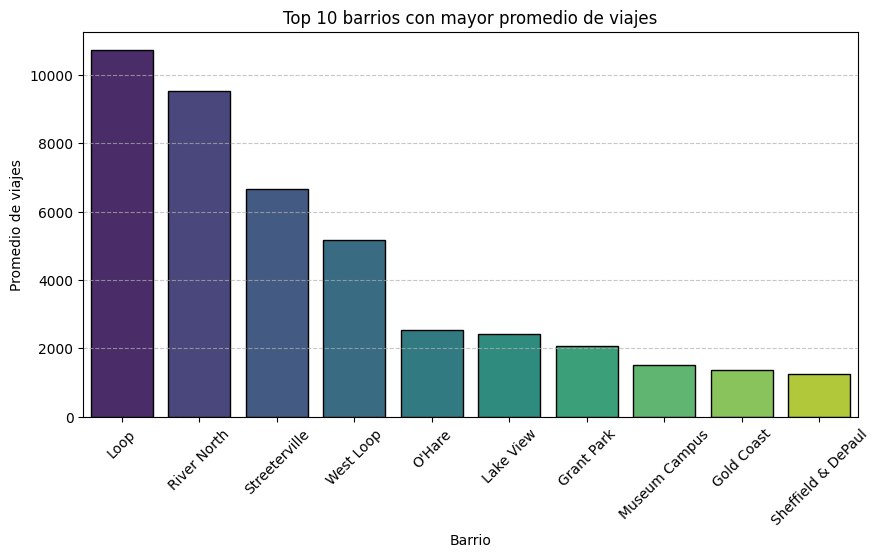

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(x='barrio', y='avg_trips', data=top_10_barrios, palette='viridis',edgecolor='black')
plt.title('Top 10 barrios con mayor promedio de viajes')
plt.xlabel('Barrio')
plt.ylabel('Promedio de viajes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Muy buen plot! Tal cual lo que te comento en el plot anterior lo haces en este. Felicidades.

</div>

<div class="alert alert-block alert-info">
<b>Existen 3 barrios que solicitan en promedio mayor número de viajes por arriba de 6,000</b> <a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-info">
<b>Podemos concluir que el mercado de empresas de taxis lo dominan 12 empresas por lo que podriamos implementar algún servicio adicional en las empresas botton que ayuden a incrementar el número de viajes focalizando a clientes que viven en los top 10 barrios con el promedio de mayor viajes de finalización, sin embargo esto puede tener varios enfoques dependiendo la comisión que nos deje cada empresa al generar cada viaje para poder apoyar al mejor postor y generar mayores utilidades.  </b> <a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Correcto! Muy buenas conclusiones

</div>

# __Prueba de hipótesis (Python)__

## Analisis de Datos

In [20]:
weather_trips = pd.read_csv('G:/.shortcut-targets-by-id/1ec4irvsZdM58w7ZpjkoK9daldWphQX4A/Proyectos/datasets/project_sql_result_07.csv')
weather_trips.info() # Analizamos la información y procedemos a cambiar ciertos formatos de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [21]:
weather_trips['start_ts'] = pd.to_datetime(weather_trips['start_ts']) # Cambiamos el formato de la fecha
weather_trips['day'] = weather_trips['start_ts'].dt.dayofweek +1 # Extraemos el día
weather_trips

,start_ts,weather_conditions,duration_seconds,day
0,2017-11-25 16:00:00,Good,2410.0,6
1,2017-11-25 14:00:00,Good,1920.0,6
2,2017-11-25 12:00:00,Good,1543.0,6
3,2017-11-04 10:00:00,Good,2512.0,6
4,2017-11-11 07:00:00,Good,1440.0,6
...,...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0,6
1064,2017-11-11 10:00:00,Good,1318.0,6
1065,2017-11-11 13:00:00,Good,2100.0,6
1066,2017-11-11 08:00:00,Good,1380.0,6


In [22]:
weather_trips['weather_conditions'].unique() # Verificamos los valores únicos de la columna weather_conditions

array(['Good', 'Bad'], dtype=object)

## Prueba Hipotesis

In [23]:
# Obtenemos nuestras 2 muestras
saturday_bad= weather_trips.query ('weather_conditions == "Bad" & day == 6')
saturday_good= weather_trips.query ('weather_conditions == "Good" & day == 6')

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Al realizar una prueba de hipótesis, es muy importante verificar los supuestos. El t-test que usaste funciona bien cuando se cumplen ciertos supuestos, como que las varianzas de ambos grupos (sábados lluviosos y no lluviosos) sean similares. Puedes realizar la prueba de levene para comprobar que los dos grupos tienen la misma varianza y, de esta forma, podrás saber el valor del parámetro equal_var que se debe utilizar en la función stats.ttest_ind.

</div>

In [24]:
# Revisamos si las varianzas son iguales
alpha = 0.05  # Nivel de significancia
p_value_levene= stats.levene(saturday_bad['duration_seconds'], saturday_good['duration_seconds']).pvalue

# Ho = Varianzas son iguales.
# H1 = Las varianzas son diferentes

if p_value_levene < alpha:
    print('Rechazamos la hipotesis nula')
else:
    print("Aceptamos la hipotesis nula")

Aceptamos la hipotesis nula


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Buen trabajo formulando la hipótesis! Es fundamental que sea claro lo que se busca analizar.
    
<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Sin embargo, lo correcto sería utilizar celdas de texto para esto.

</div>

</div>

In [25]:
# HIPOTESIS NULA: La duración promedio de los viajes los sabados de lluvia(Bad) cambia respecto a los sabados sin lluvia(Good)
# HIPOTESIS ALTERNATIVA: La duración promedio de los viajes los sabados de lluvia(Bad) no cambia respecto a los sabados sin lluvia(Good)

alpha = 0.05

resultados = stats.ttest_ind(saturday_bad['duration_seconds'], saturday_good['duration_seconds'], equal_var=True)

# Imprimir el valor p
print('Valor p:', resultados.pvalue)

# Comparar el valor p con el umbral
if resultados.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")



Valor p: 6.517970327099473e-12
Rechazamos la hipótesis nula


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Interpretaste correctamente el valor p y sacaste conclusiones estadísticas válidas. Debemos rechazar efectivamente la hipótesis nula. 

</div>

<div class="alert alert-block alert-info">
<b> La hipotesis nula es: La duración promedio de los viajes los sabados de lluvia(Bad) cambia respecto a los sabados sin lluvia(Good); al aplicar nuestro método el valor p es mucho menor al valor de significancia alpha por lo que se rechaza la hipotesis. 

Podemos concluir que es aceptable nuestra hipotesis por lo siguiente:

    1.- Existe la posibilidad que la gente tome rutas alternas lo cual no afecta la duración del viaje con lluvia o sin lluvia
    2.- No tenemos sobrepoblacion que impacte en el tráfico y aumente la duración de los viajes por lluvia
    3.- Las personas son educadas y siguen las leyes de vialidad lo que no afecta la duración del viaje
    4.- Posiblemente se tomo una muestra donde el clima no tuvo lluvias extremas
    
</div>

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Dejas durante todo el proyecto comentarios correctos y conclusiones super claras. Felicidades!

</div>


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Felicidades Javier! Tu trabajo es excelente. 

Has completado todos los items necesarios para aprobar la entrega.

Sigue así!

</div>